<a href="https://colab.research.google.com/github/bmreiniger/datascience.stackexchange/blob/master/upsample_vs_class_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import numpy as np


In [0]:
X_raw, y_raw = load_wine(return_X_y=True)
y_raw = (y_raw==2)
#X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, stratify=y)

In [18]:
y_raw.sum(), len(y_raw), y_raw.mean()

(48, 178, 0.2696629213483146)

In [29]:
X_raw[:14,:].shape, X_raw.shape

((14, 13), (178, 13))

In [0]:
X = np.vstack([X_raw[:14,:], X_raw])
y = np.hstack([y_raw[:14], y])

In [42]:
X.shape, y.shape

((192, 13), (192,))

In [43]:
y.mean()

0.25

In [44]:
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X, y)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
X_re = np.vstack([X, X[-48:,:]])
y_re = np.hstack([y, y[-48:]])
dt2 = DecisionTreeClassifier()
dt2.fit(X_re, y_re)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(167.4, 181.2, 'X[6] <= 1.4\ngini = 0.5\nsamples = 192\nvalue = [96.0, 96.0]'),
 Text(83.7, 108.72, 'X[9] <= 3.725\ngini = 0.124\nsamples = 57\nvalue = [6.667, 94.0]'),
 Text(41.85, 36.23999999999998, 'gini = 0.0\nsamples = 10\nvalue = [6.667, 0.0]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 47\nvalue = [0, 94]'),
 Text(251.10000000000002, 108.72, 'X[11] <= 1.445\ngini = 0.043\nsamples = 135\nvalue = [89.333, 2.0]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 134\nvalue = [89.333, 0.0]')]

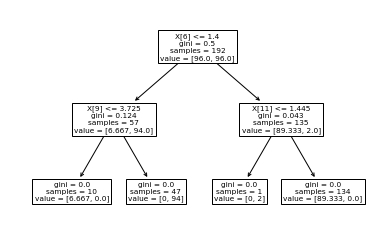

In [63]:
from sklearn.tree import plot_tree
plot_tree(dt)

[Text(167.4, 181.2, 'X[6] <= 1.4\ngini = 0.48\nsamples = 240\nvalue = [144, 96]'),
 Text(83.7, 108.72, 'X[9] <= 3.725\ngini = 0.174\nsamples = 104\nvalue = [10, 94]'),
 Text(41.85, 36.23999999999998, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 94\nvalue = [0, 94]'),
 Text(251.10000000000002, 108.72, 'X[11] <= 1.445\ngini = 0.029\nsamples = 136\nvalue = [134, 2]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(292.95, 36.23999999999998, 'gini = 0.0\nsamples = 134\nvalue = [134, 0]')]

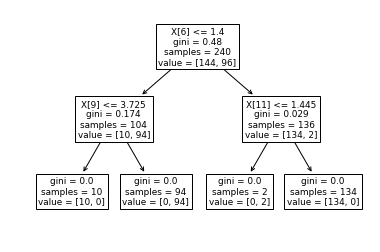

In [64]:
plot_tree(dt2)

[Text(167.4, 195.696, 'X[11] <= 2.115\ngini = 0.394\nsamples = 178\nvalue = [130, 48]'),
 Text(83.7, 152.208, 'X[9] <= 3.56\ngini = 0.233\nsamples = 52\nvalue = [7, 45]'),
 Text(41.85, 108.72, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(125.55000000000001, 108.72, 'X[6] <= 1.4\ngini = 0.081\nsamples = 47\nvalue = [2, 45]'),
 Text(83.7, 65.232, 'gini = 0.0\nsamples = 44\nvalue = [0, 44]'),
 Text(167.4, 65.232, 'X[7] <= 0.375\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(125.55000000000001, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(209.25, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(251.10000000000002, 152.208, 'X[6] <= 0.795\ngini = 0.046\nsamples = 126\nvalue = [123, 3]'),
 Text(209.25, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(292.95, 108.72, 'gini = 0.0\nsamples = 123\nvalue = [123, 0]')]

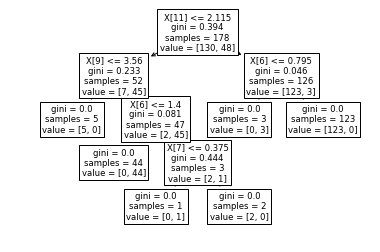

In [65]:
dt3 = DecisionTreeClassifier()
dt3.fit(X_raw, y_raw)
plot_tree(dt3)